<a href="https://colab.research.google.com/github/AbhiSrvstv/Airbnb-data-analysis/blob/main/Abhishek_Anand_Airbnb_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

### Acquaring and Loading Data

In [ ]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#examing head of  csv file 
df = pd.read_csv('/content/drive/MyDrive/AirBnB Bookings Analysis/Airbnb NYC 2019.csv')
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#checking amount of rows in given dataset to understand the size we are working with
len(df)

48895

In [ ]:
#checking type of every column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

###Understadning, Wrangling and Cleaning Data

In [ ]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
df.isna().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In our case, missing data that is observed does not need too much special treatment. Looking into the nature of our dataset we can state further things: columns "name" and "host_name" are irrelevant and insignificant to our data analysis, columns "last_review" and "review_per_month" need very simple handling. To elaborate, "last_review" is date; if there were no reviews for the listing - date simply will not exist. In our case, this column is irrelevant and insignificant therefore appending those values is not needed. For "review_per_month" column we can simply append it with 0.0 for missing values; we can see that in "number_of_review" that column will have a 0, therefore following this logic with 0 total reviews there will be 0.0 rate of reviews per month. Therefore, let's proceed with removing columns that are not important and handling of missing data.

In [ ]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
df.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
df.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365


We are dropping 'host_name' only because it is insignificant. `

In [ ]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

In [ ]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(df.neighbourhood.unique())

221

In [ ]:
#examining the unique values of room_type as this column will appear very handy for later analysis
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
#Check for duplicated entries
sum(df.duplicated())

0

Now that we’ve cleaned the unnecessary features from the dataset, let’s move on to the
analysis.

### Exploring and Visualizing Data

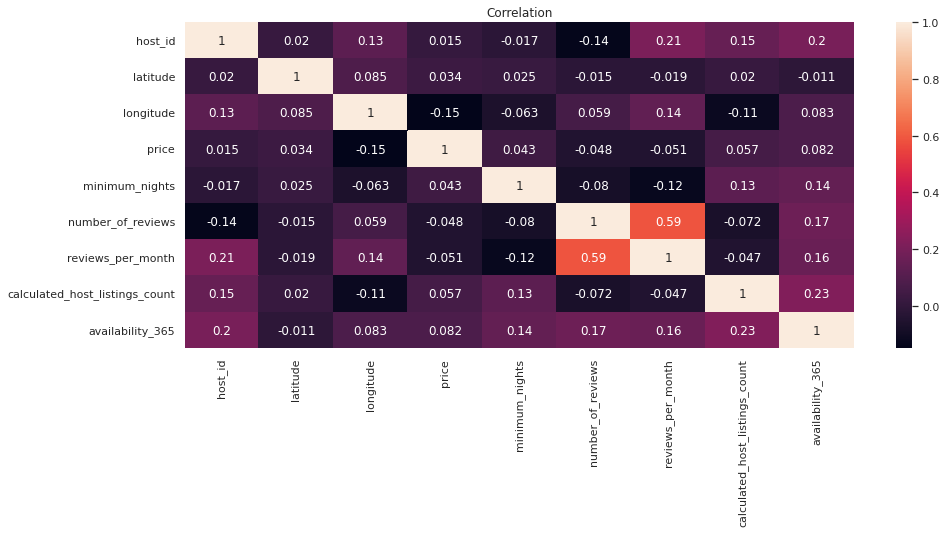

In [ ]:
#First let's check the correlation using heatmap
plt.figure(figsize=(15,6))
plt.title('Correlation')
sns.heatmap(df.corr(),annot = True)
plt.show()

In [ ]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on airbnb platform and taking advantage of this service
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [ ]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

In [ ]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

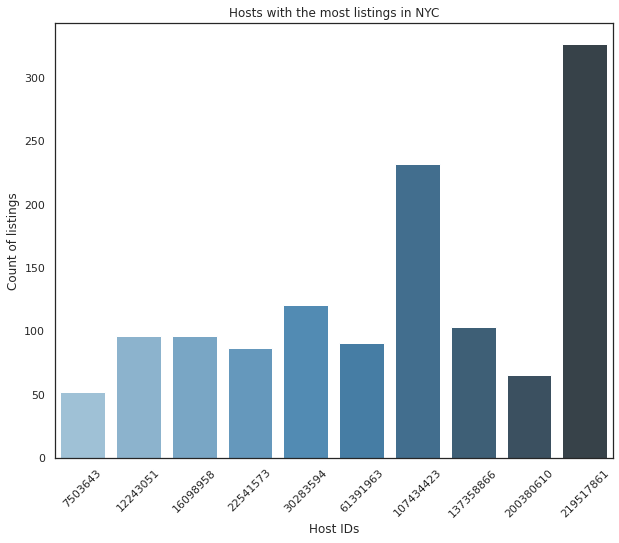

In [ ]:
viz_1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

We have found hosts that take good advantage of the airbnb platform provide the most listings as we found that our top host has 327 listings.

In [ ]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=df.loc[df['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [ ]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


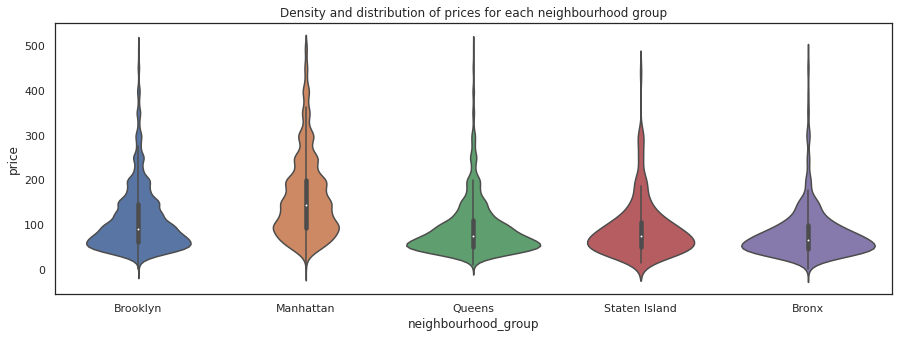

In [ ]:
#viz_2

#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices
plt.figure(figsize=(15,5))
viz_2 = sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighbourhood group')
plt.show()

We can state that Manhattan has the highest range of prices for the listings with 150 dollars price as average observation, followed by Brooklyn with 90 dollars per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all.

In [ ]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

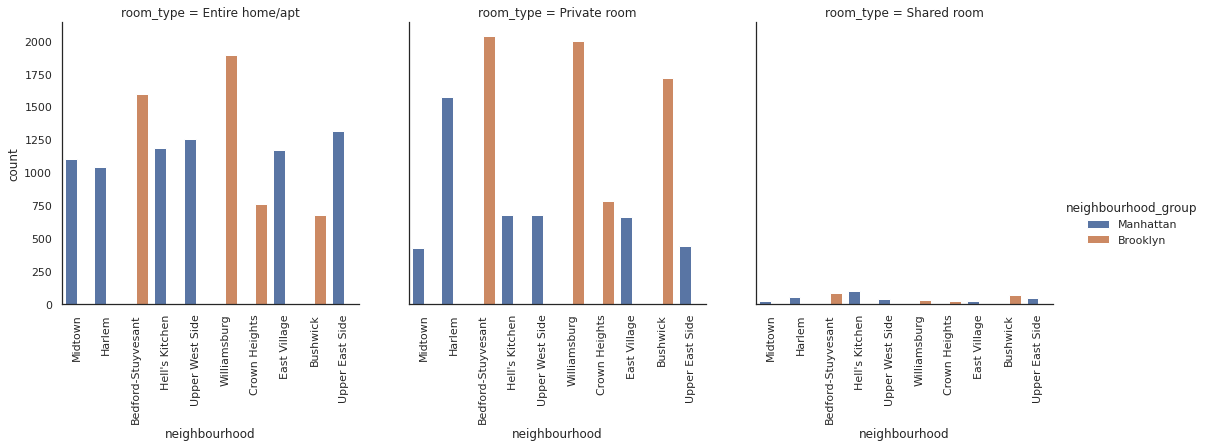

In [ ]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)



Shared room type airbnb listing is barely available among 10 most listing-populated neighborhoods. Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.











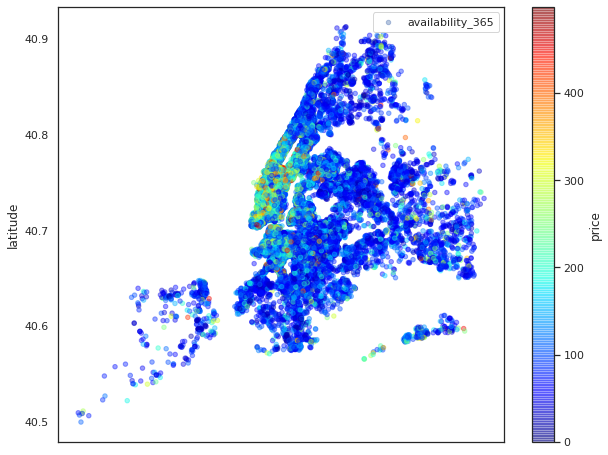

In [ ]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

Good, scatterplot worked just fine to output our latitude and longitude points. However, it would be nice to have a map bellow for fully immersive heatmap in ourcase - let's see what we can do!

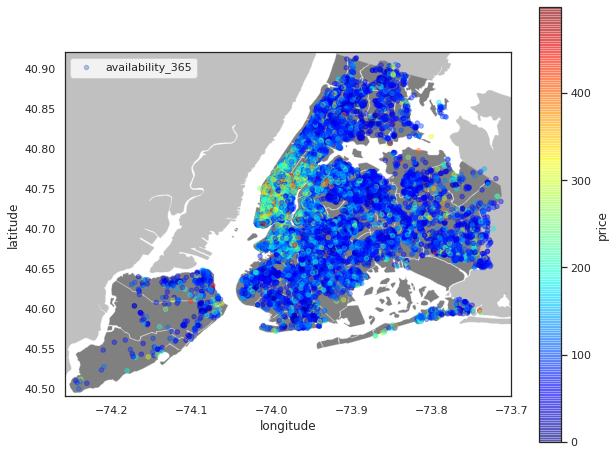

In [ ]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

we observe that we end up with a very immersive heatmap. Using latitude and longitude points were able to visualize all NYC listings. Also, we added a color-coded range for each point on the map based on the price of the listing. However, it is important to note that we had to drop some extremely high values as they are treated as outliers for our analysis.

In [ ]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in df.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [ ]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [ ]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

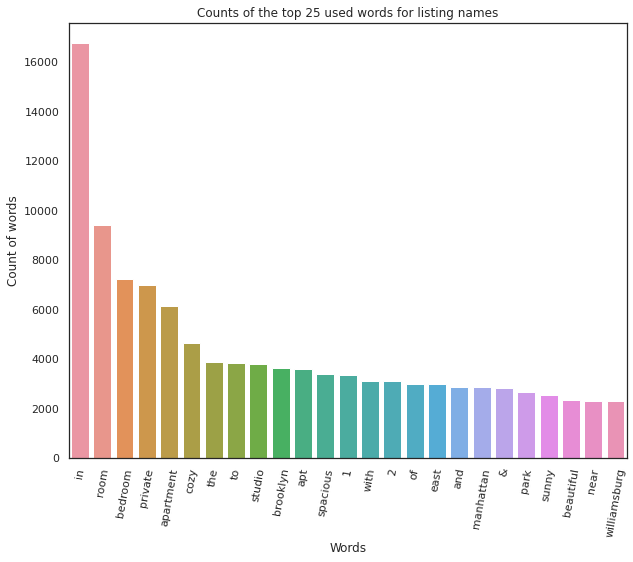

In [ ]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

We can observe that finding out and going over top 25 used listings' name words - we are able to see one clear trend. It shows that hosts are simply describing their listing in a short form with very specific terms for easier search by a potential traveler. Such wors are 'room', 'bedroom', 'private', 'apartment', 'studio'. This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. This technique was somewhat expected as dealing with multilingual customers can be tricky and you definitely want to describe your space in a concise and understood form as much as possible.

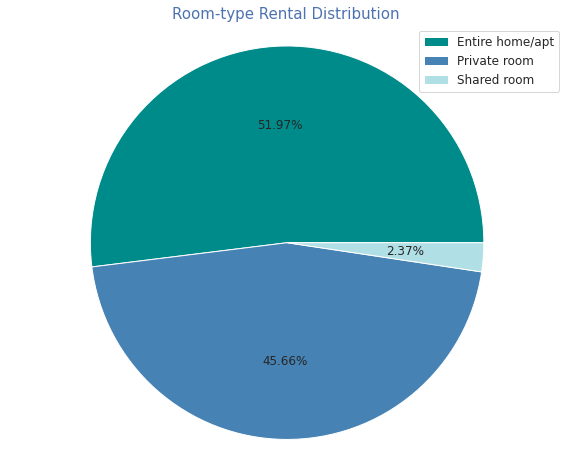

In [ ]:
# Now let's check What proportion of the rentals correspond to each room type? 
# We are going to use the piechart for this visualization

room_type = df.groupby('room_type')['latitude'].count().reset_index()
room_type.rename(columns={'latitude':'n_rooms'},inplace=True)
plt.figure(figsize=(10,8))
plt.pie(room_type['n_rooms'],autopct='%1.2f%%', colors=['darkcyan', 'steelblue','powderblue'])
plt.axis('equal')
plt.legend(labels=room_type['room_type'],loc='best',fontsize='12')
plt.title('Room-type Rental Distribution', fontsize='15',color='b')
plt.show()
plt.close()

From the whole rentals available in the dataset, 52% of them correspond to entire-home apartments, 46% to private-room rentals and the minority remaining corresponds to shared rooms with a 2% of the sample.

In [ ]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [ ]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


There is no reason to visualize this as table format would be the most suitable output for better reading. From this table output, we can observe that top 10 most reviewed listings on df for NYC has price average of 65 dollars with most of the listings under 50 dollars, and 9/10 of them are 'Private room' type; top reviewed listing has 629 reviews

### Conclusion

1. We have found hosts that take good advantage of the airbnb platform provide the most listings as we found that our top host has 327 listings. 
2. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. 
3. Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. 
4. Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts.
5. Low cost rooms or in range 0-50 $ have more reviews. This shows us that people who pay more for the rooms generally don’t write reviews. It is observed people write reviews more if they are not happy with their experience. In case of costly rooms there is high possibility that the customers are happy. So they dont write much reviews.
6. Lastly, we found the most reviewed listings and analyzed some additional attributes.